Link to Jupyter Notebook: https://github.com/ebtezcan/EV-Charger-Prediction/blob/master/final_notebook.ipynb

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(threshold=sys.maxsize)

In [6]:
df_vehicle = pd.read_csv('/content/drive/Shareddrives/DATA 298B/Datasets/cleaned_electric_vehicles.csv')

In [7]:
df_stations = pd.read_csv('/content/drive/Shareddrives/DATA 298B/Datasets/cleaned_ev_stations.csv')

In [8]:
df_vehicle

,Unnamed: 0,year,zip,num_vehicles
0,0,2010,90010,2
1,1,2010,90012,5
2,2,2010,90020,1
3,3,2010,90021,1
4,4,2010,90024,7
...,...,...,...,...
17222,17222,2021,96158,4
17223,17223,2021,96160,4
17224,17224,2021,96161,265
17225,17225,2021,96162,4


In [9]:
df_vehicle.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
df_vehicle

,year,zip,num_vehicles
0,2010,90010,2
1,2010,90012,5
2,2010,90020,1
3,2010,90021,1
4,2010,90024,7
...,...,...,...
17222,2021,96158,4
17223,2021,96160,4
17224,2021,96161,265
17225,2021,96162,4


In [11]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17227 entries, 0 to 17226
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   year          17227 non-null  int64
 1   zip           17227 non-null  int64
 2   num_vehicles  17227 non-null  int64
dtypes: int64(3)
memory usage: 403.9 KB


In [12]:
zips = df_vehicle['zip'].unique()
zips.sort()
print(zips)

[89061 90001 90002 90003 90004 90005 90006 90007 90008 90009 90010 90011
 90012 90013 90014 90015 90016 90017 90018 90019 90020 90021 90022 90023
 90024 90025 90026 90027 90028 90029 90030 90031 90032 90033 90034 90035
 90036 90037 90038 90039 90040 90041 90042 90043 90044 90045 90046 90047
 90048 90049 90051 90053 90055 90056 90057 90058 90059 90060 90061 90062
 90063 90064 90065 90066 90067 90068 90069 90071 90073 90075 90076 90077
 90078 90079 90081 90083 90084 90086 90089 90093 90094 90095 90096 90201
 90202 90209 90210 90211 90212 90213 90220 90221 90222 90223 90224 90230
 90231 90232 90239 90240 90241 90242 90245 90247 90248 90249 90250 90251
 90254 90255 90260 90262 90263 90264 90265 90266 90267 90270 90272 90274
 90275 90277 90278 90280 90290 90291 90292 90293 90294 90295 90296 90301
 90302 90303 90304 90305 90308 90309 90401 90402 90403 90404 90405 90406
 90407 90408 90409 90410 90501 90502 90503 90504 90505 90506 90508 90509
 90510 90601 90602 90603 90604 90605 90606 90607 90

In [13]:
df_vehicle = df_vehicle[df_vehicle['zip'] != 89061]
df_vehicle = df_vehicle[df_vehicle['zip'] != 99999]

In [14]:
zips = df_vehicle['zip'].unique()
zips.sort()
print(zips)

[90001 90002 90003 90004 90005 90006 90007 90008 90009 90010 90011 90012
 90013 90014 90015 90016 90017 90018 90019 90020 90021 90022 90023 90024
 90025 90026 90027 90028 90029 90030 90031 90032 90033 90034 90035 90036
 90037 90038 90039 90040 90041 90042 90043 90044 90045 90046 90047 90048
 90049 90051 90053 90055 90056 90057 90058 90059 90060 90061 90062 90063
 90064 90065 90066 90067 90068 90069 90071 90073 90075 90076 90077 90078
 90079 90081 90083 90084 90086 90089 90093 90094 90095 90096 90201 90202
 90209 90210 90211 90212 90213 90220 90221 90222 90223 90224 90230 90231
 90232 90239 90240 90241 90242 90245 90247 90248 90249 90250 90251 90254
 90255 90260 90262 90263 90264 90265 90266 90267 90270 90272 90274 90275
 90277 90278 90280 90290 90291 90292 90293 90294 90295 90296 90301 90302
 90303 90304 90305 90308 90309 90401 90402 90403 90404 90405 90406 90407
 90408 90409 90410 90501 90502 90503 90504 90505 90506 90508 90509 90510
 90601 90602 90603 90604 90605 90606 90607 90608 90

In [15]:
df_vehicle_pivot = df_vehicle.pivot_table(index='year',columns='zip',values='num_vehicles')
df_vehicle_pivot

zip,90001,90002,90003,90004,90005,90006,90007,90008,90009,90010,...,96143,96145,96146,96148,96150,96151,96158,96160,96161,96162
year,,,,,,,,,,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,10.0,1.0,3.0,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2013,NaN,2.0,1.0,33.0,7.0,7.0,1.0,6.0,NaN,13.0,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN
2014,2.0,3.0,1.0,74.0,14.0,14.0,12.0,18.0,NaN,23.0,...,NaN,4.0,NaN,NaN,3.0,1.0,1.0,NaN,5.0,NaN
2015,4.0,6.0,3.0,108.0,28.0,23.0,19.0,30.0,NaN,29.0,...,1.0,6.0,3.0,NaN,13.0,1.0,NaN,NaN,18.0,NaN
2016,4.0,16.0,5.0,158.0,39.0,40.0,27.0,54.0,NaN,49.0,...,2.0,6.0,3.0,NaN,16.0,1.0,NaN,1.0,25.0,NaN
2017,11.0,18.0,11.0,206.0,44.0,42.0,30.0,75.0,2.0,54.0,...,3.0,9.0,7.0,NaN,21.0,NaN,NaN,NaN,40.0,1.0
2018,8.0,19.0,17.0,260.0,77.0,50.0,34.0,117.0,2.0,69.0,...,3.0,15.0,10.0,2.0,30.0,2.0,1.0,1.0,72.0,1.0


In [16]:
df_vehicle_pivot.fillna(0, inplace=True)
df_vehicle_pivot

zip,90001,90002,90003,90004,90005,90006,90007,90008,90009,90010,...,96143,96145,96146,96148,96150,96151,96158,96160,96161,96162
year,,,,,,,,,,,,,,,,,,,,,
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,10.0,1.0,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,2.0,1.0,33.0,7.0,7.0,1.0,6.0,0.0,13.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
2014,2.0,3.0,1.0,74.0,14.0,14.0,12.0,18.0,0.0,23.0,...,0.0,4.0,0.0,0.0,3.0,1.0,1.0,0.0,5.0,0.0
2015,4.0,6.0,3.0,108.0,28.0,23.0,19.0,30.0,0.0,29.0,...,1.0,6.0,3.0,0.0,13.0,1.0,0.0,0.0,18.0,0.0
2016,4.0,16.0,5.0,158.0,39.0,40.0,27.0,54.0,0.0,49.0,...,2.0,6.0,3.0,0.0,16.0,1.0,0.0,1.0,25.0,0.0
2017,11.0,18.0,11.0,206.0,44.0,42.0,30.0,75.0,2.0,54.0,...,3.0,9.0,7.0,0.0,21.0,0.0,0.0,0.0,40.0,1.0
2018,8.0,19.0,17.0,260.0,77.0,50.0,34.0,117.0,2.0,69.0,...,3.0,15.0,10.0,2.0,30.0,2.0,1.0,1.0,72.0,1.0


In [17]:
df_vehicle_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2010 to 2021
Columns: 2154 entries, 90001 to 96162
dtypes: float64(2154)
memory usage: 202.0 KB


In [18]:
cols = list(df_vehicle_pivot.columns.values)
df_vehicle_pivot[cols] = df_vehicle_pivot[cols].astype(int)
df_vehicle_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2010 to 2021
Columns: 2154 entries, 90001 to 96162
dtypes: int64(2154)
memory usage: 202.0 KB


In [19]:
df_vehicle_pivot

zip,90001,90002,90003,90004,90005,90006,90007,90008,90009,90010,...,96143,96145,96146,96148,96150,96151,96158,96160,96161,96162
year,,,,,,,,,,,,,,,,,,,,,
2010,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,4,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2012,0,0,0,10,1,3,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2013,0,2,1,33,7,7,1,6,0,13,...,0,1,0,0,1,0,0,0,2,0
2014,2,3,1,74,14,14,12,18,0,23,...,0,4,0,0,3,1,1,0,5,0
2015,4,6,3,108,28,23,19,30,0,29,...,1,6,3,0,13,1,0,0,18,0
2016,4,16,5,158,39,40,27,54,0,49,...,2,6,3,0,16,1,0,1,25,0
2017,11,18,11,206,44,42,30,75,2,54,...,3,9,7,0,21,0,0,0,40,1
2018,8,19,17,260,77,50,34,117,2,69,...,3,15,10,2,30,2,1,1,72,1


In [20]:
df_vehicle_pivot['State Total'] = df_vehicle_pivot.sum(axis=1)
df_vehicle_pivot

zip,90001,90002,90003,90004,90005,90006,90007,90008,90009,90010,...,96145,96146,96148,96150,96151,96158,96160,96161,96162,State Total
year,,,,,,,,,,,,,,,,,,,,,
2010,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,589
2011,0,0,0,4,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,4207
2012,0,0,0,10,1,3,1,1,0,1,...,0,0,0,1,0,0,0,0,0,7787
2013,0,2,1,33,7,7,1,6,0,13,...,1,0,0,1,0,0,0,2,0,24907
2014,2,3,1,74,14,14,12,18,0,23,...,4,0,0,3,1,1,0,5,0,49868
2015,4,6,3,108,28,23,19,30,0,29,...,6,3,0,13,1,0,0,18,0,82292
2016,4,16,5,158,39,40,27,54,0,49,...,6,3,0,16,1,0,1,25,0,115050
2017,11,18,11,206,44,42,30,75,2,54,...,9,7,0,21,0,0,0,40,1,158597
2018,8,19,17,260,77,50,34,117,2,69,...,15,10,2,30,2,1,1,72,1,229446


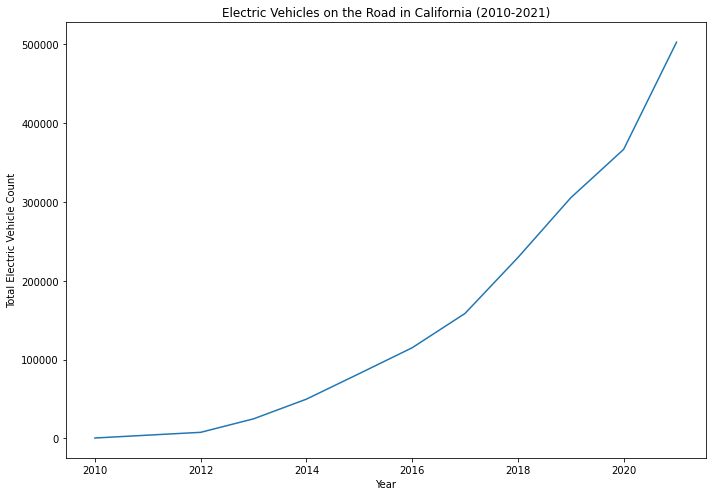

In [21]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x='year', y='State Total', data=df_vehicle_pivot, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Total Electric Vehicle Count')
ax.set_title('Electric Vehicles on the Road in California (2010-2021)')
plt.tight_layout()

In [22]:
df_vehicle_pivot.iloc[-1].sort_values(ascending=False)[:11]

zip
State Total    502625
94539            3476
94568            3225
95014            3199
92130            3068
94080            3033
94538            3016
94582            2784
95070            2589
92620            2546
95035            2425
Name: 2021, dtype: int64

In [70]:
top_ten_zipcodes = [94539,94568,95014,92130,94080,94538,94582,95070,92620,95035]

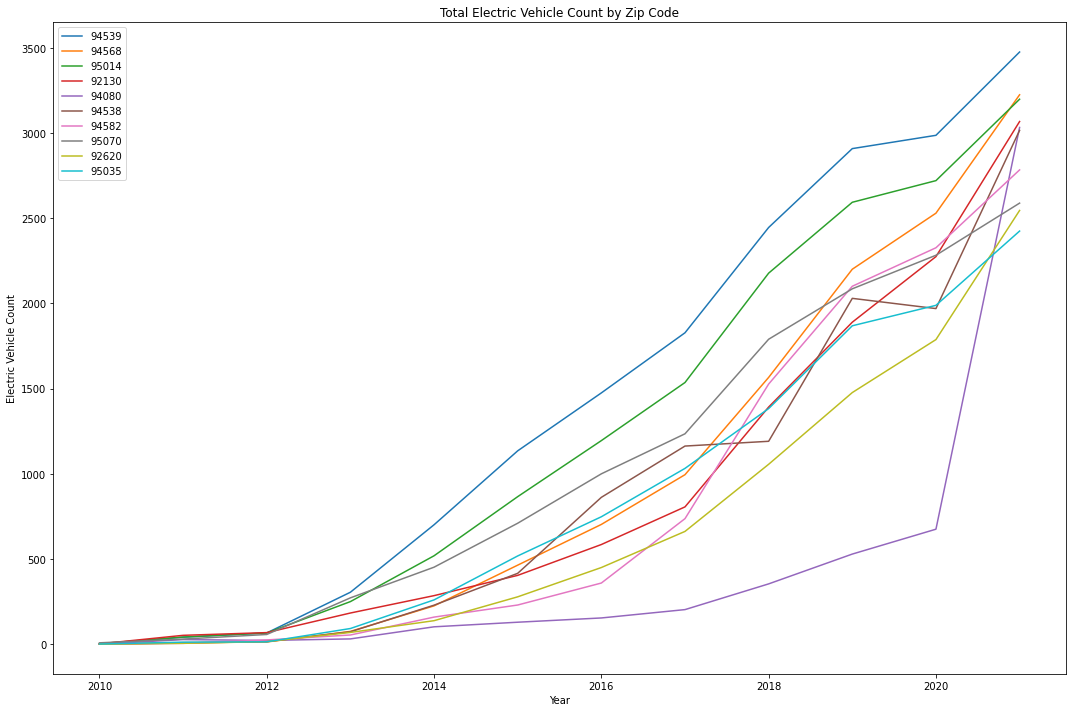

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
for zipcode in top_ten_zipcodes:
    sns.lineplot(x='year', y=zipcode, data=df_vehicle_pivot, ax=ax, label=zipcode)
ax.set_xlabel('Year')
ax.set_ylabel('Electric Vehicle Count')
ax.set_title('Total Electric Vehicle Count by Zip Code')
ax.legend()
plt.tight_layout();

In [25]:
df_vehicle_top_ten = df_vehicle_pivot[top_ten_zipcodes]
df_vehicle_top_ten

zip,94539,94568,95014,92130,94080,94538,94582,95070,92620,95035
year,,,,,,,,,,
2010,1,0,3,2,0,0,0,8,0,1
2011,41,9,42,52,27,7,5,30,5,12
2012,66,13,66,68,22,15,25,57,15,14
2013,305,75,250,183,31,73,54,272,69,92
2014,701,225,519,285,102,229,159,452,138,260
2015,1135,464,866,404,129,416,230,710,278,518
2016,1475,703,1195,585,154,862,359,1000,450,748
2017,1828,995,1536,806,203,1163,737,1235,662,1032
2018,2446,1566,2178,1392,354,1191,1527,1790,1056,1383


In [26]:
df_stations

,Unnamed: 0,city,zip,level2_count,latitude,longitude,year
0,0,345,90015,12,34.040539,-118.271387,1995
1,1,173,91731,3,34.068720,-118.064000,1996
2,2,296,92037,1,32.899470,-117.243000,1997
3,3,585,91343,2,34.221665,-118.468371,2012
4,4,514,92503,4,33.909914,-117.459053,1997
...,...,...,...,...,...,...,...
13610,13613,345,90013,1,34.045656,-118.238655,2022
13611,13614,564,95054,2,37.380939,-121.972505,2022
13612,13615,538,92037,2,32.874951,-117.225325,2022
13613,13616,541,94128,2,37.637894,-122.393375,2022


In [27]:
df_stations.drop(['Unnamed: 0', 'city','latitude','longitude'], axis=1, inplace=True)

In [28]:
df_stations

,zip,level2_count,year
0,90015,12,1995
1,91731,3,1996
2,92037,1,1997
3,91343,2,2012
4,92503,4,1997
...,...,...,...
13610,90013,1,2022
13611,95054,2,2022
13612,92037,2,2022
13613,94128,2,2022


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
zips = df_stations['zip'].unique()
zips.sort()
print(zips)

[  987 10533 10535 21041 81435 90001 90002 90003 90004 90005 90006 90007
 90008 90010 90011 90012 90013 90014 90015 90016 90017 90018 90019 90020
 90021 90022 90024 90025 90026 90027 90028 90029 90031 90032 90033 90034
 90035 90036 90037 90038 90039 90040 90041 90042 90043 90044 90045 90046
 90047 90048 90049 90056 90057 90059 90061 90062 90063 90064 90065 90066
 90067 90068 90069 90071 90077 90079 90089 90094 90095 90201 90210 90211
 90212 90220 90230 90232 90240 90241 90242 90245 90247 90248 90249 90250
 90254 90262 90263 90265 90266 90272 90274 90275 90277 90278 90280 90290
 90291 90292 90293 90301 90303 90304 90305 90401 90402 90403 90404 90405
 90481 90501 90502 90503 90504 90505 90601 90602 90603 90604 90620 90621
 90623 90630 90631 90638 90639 90640 90650 90660 90670 90680 90701 90703
 90706 90710 90712 90713 90715 90716 90717 90720 90723 90731 90732 90740
 90744 90745 90746 90755 90802 90803 90805 90806 90807 90808 90810 90813
 90815 90840 90846 91006 91007 91010 91016 91030 91

In [30]:
df_stations = df_stations[df_stations['zip'] != 987]
df_stations = df_stations[df_stations['zip'] != 10533]
df_stations = df_stations[df_stations['zip'] != 10535]
df_stations = df_stations[df_stations['zip'] != 21041]
df_stations = df_stations[df_stations['zip'] != 81435]

In [31]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13610 entries, 0 to 13614
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   zip           13610 non-null  int64
 1   level2_count  13610 non-null  int64
 2   year          13610 non-null  int64
dtypes: int64(3)
memory usage: 425.3 KB


In [32]:
df_stations_pivot = df_stations.pivot_table(index='year',columns='zip',values='level2_count', fill_value=0, aggfunc=np.sum)
df_stations_pivot = df_stations_pivot.cumsum(axis=0)
df_stations_pivot

zip,90001,90002,90003,90004,90005,90006,90007,90008,90010,90011,...,96106,96115,96120,96130,96145,96146,96148,96150,96161,99067
year,,,,,,,,,,,,,,,,,,,,,
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_stations_pivot.iloc[-1].sort_values(ascending=False)[:10]

zip
94025    578
95054    561
92618    410
92101    365
90012    331
94080    314
95814    279
90045    277
92802    267
90067    254
Name: 2022, dtype: int64

In [34]:
df_vehicle_pivot['State Total'] = df_vehicle_pivot.sum(axis=1)
df_vehicle_pivot

zip,90001,90002,90003,90004,90005,90006,90007,90008,90009,90010,...,96145,96146,96148,96150,96151,96158,96160,96161,96162,State Total
year,,,,,,,,,,,,,,,,,,,,,
2010,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1178
2011,0,0,0,4,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,8414
2012,0,0,0,10,1,3,1,1,0,1,...,0,0,0,1,0,0,0,0,0,15574
2013,0,2,1,33,7,7,1,6,0,13,...,1,0,0,1,0,0,0,2,0,49814
2014,2,3,1,74,14,14,12,18,0,23,...,4,0,0,3,1,1,0,5,0,99736
2015,4,6,3,108,28,23,19,30,0,29,...,6,3,0,13,1,0,0,18,0,164584
2016,4,16,5,158,39,40,27,54,0,49,...,6,3,0,16,1,0,1,25,0,230100
2017,11,18,11,206,44,42,30,75,2,54,...,9,7,0,21,0,0,0,40,1,317194
2018,8,19,17,260,77,50,34,117,2,69,...,15,10,2,30,2,1,1,72,1,458892


In [35]:
df_gas_prices = pd.read_csv('/content/drive/Shareddrives/DATA 298B/Datasets/gas_prices.csv')
df_gas_prices

,Year,Mean Gas Price
0,2000,$1.53
1,2001,$1.48
2,2002,$1.31
3,2003,$1.55
4,2004,$1.90
5,2005,$2.37
6,2006,$2.43
7,2007,$2.70
8,2008,$3.34
9,2009,$2.24


In [36]:
df_gas_prices.rename({"Year": "year", "Mean Gas Price": "mean_gas_price"}, axis=1, inplace=True)
df_gas_prices

,year,mean_gas_price
0,2000,$1.53
1,2001,$1.48
2,2002,$1.31
3,2003,$1.55
4,2004,$1.90
5,2005,$2.37
6,2006,$2.43
7,2007,$2.70
8,2008,$3.34
9,2009,$2.24


In [37]:
df_gas_prices['mean_gas_price'] = df_gas_prices['mean_gas_price'].str.replace('$', '').astype(float)
df_gas_prices

<ipython-input-37-7ada3cec23f1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_gas_prices['mean_gas_price'] = df_gas_prices['mean_gas_price'].str.replace('$', '').astype(float)


,year,mean_gas_price
0,2000,1.53
1,2001,1.48
2,2002,1.31
3,2003,1.55
4,2004,1.90
5,2005,2.37
6,2006,2.43
7,2007,2.70
8,2008,3.34
9,2009,2.24


In [38]:
df_population = pd.read_csv('/content/drive/Shareddrives/DATA 298B/Datasets/population.csv')
df_population

,location,year,population
0,California,2010,"37,363,368"
1,California,2011,"37,703,593"
2,California,2012,"38,055,785"
3,California,2013,"38,342,642"
4,California,2014,"38,644,802"
...,...,...,...
703,Yuba,2017,"78,181"
704,Yuba,2018,"79,043"
705,Yuba,2019,"80,250"
706,Yuba,2020,"81,468"


In [39]:
df_population['population'] = df_population['population'].str.replace('$', '').str.replace(',', '').astype(int)
df_population

<ipython-input-39-6949e2a67649>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_population['population'] = df_population['population'].str.replace('$', '').str.replace(',', '').astype(int)


,location,year,population
0,California,2010,37363368
1,California,2011,37703593
2,California,2012,38055785
3,California,2013,38342642
4,California,2014,38644802
...,...,...,...
703,Yuba,2017,78181
704,Yuba,2018,79043
705,Yuba,2019,80250
706,Yuba,2020,81468


In [40]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    708 non-null    object
 1   year        708 non-null    int64 
 2   population  708 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.7+ KB


In [41]:
df_population_pivot = df_population.pivot_table(index='year',columns='location',values='population', fill_value=0)
df_population_pivot

location,Alameda,Alpine,Amador,Butte,Calaveras,California,Colusa,Contra Costa,Del Norte,El Dorado,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
year,,,,,,,,,,,,,,,,,,,,,
2010,1516617,1177,37714,220619,45565,37363368,21322,1053028,28421,181135,...,484014,516536,94844,63386,13821,442343,55313,825009,202503,72408
2011,1535986,1181,37122,222149,45519,37703593,21356,1068330,28261,180832,...,487533,519341,94528,63251,13877,447272,55353,832547,202754,73140
2012,1560713,1186,36903,224316,45512,38055785,21406,1082513,28038,180978,...,490398,523837,94816,63192,13987,451114,54638,837333,205138,73721
2013,1584064,1193,36561,225544,45429,38342642,21464,1098192,27589,181963,...,494852,527012,95909,63021,14058,453765,55321,842775,206723,74137
2014,1608614,1199,36930,227830,45423,38644802,21414,1112733,27260,181898,...,498151,530332,95217,63161,14151,456558,55095,846966,207708,74877
2015,1630159,1201,36905,229359,45414,38913507,21455,1128317,27113,182205,...,500553,535436,95844,63509,14228,459935,55104,850038,209893,75748
2016,1647332,1207,37929,230681,45365,39127855,21677,1141566,27070,182937,...,501989,540856,96517,63999,14840,462223,55162,850227,213224,76782
2017,1659750,1211,38549,233080,45354,39328926,21792,1149457,26898,184800,...,501111,546499,97771,64141,15498,465343,55032,849979,215072,78181
2018,1669659,1208,40038,234627,45365,39476064,21690,1158017,27572,187122,...,496869,549544,99334,64568,15754,467656,55311,849523,216474,79043


In [45]:
## train - test split 

df = pd.merge(df_stations, df_vehicle, on=['zip','year'])
df

,zip,level2_count,year,num_vehicles
0,91343,2,2012,2
1,90802,1,2012,6
2,92262,2,2011,2
3,94588,2,2012,11
4,90405,3,2019,591
...,...,...,...,...
11369,92057,0,2018,180
11370,92376,0,2018,30
11371,90247,0,2021,252
11372,91739,0,2018,271


In [67]:
## top 10 zipcodes:
top_ten_zipcodes = ['92618','94025','95054','94080','92802']

In [65]:
#filtering out counties to keep top 10
df_cumsum = df.loc[:, ['num_vehicles', *top_ten_zipcodes]]
df_cumsum.head()

KeyError: ignored

In [63]:
df['zip'].value_counts()

92618    314
94025    301
95054    249
94080    125
92802    123
        ... 
93002      1
95376      1
91945      1
95503      1
95735      1
Name: zip, Length: 1039, dtype: int64

In [47]:
X = df[['zip', 'level2_count','year']].values 

In [48]:
y = df['num_vehicles'].values 

In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [53]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor() 

In [54]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [55]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
prediction = model.predict(X_test)
# print('pred',prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

95299.74751696577
308.7065718720056


In [69]:
def separate_data_by_county(county, df):
    """Function separates the given dataframe by county and returns the 
    separated dataframe.
    -------------------------------
    Arguments:
    county: str
    Name of county that will be separated from the dataframe. 
    
    df: class: pandas.DataFrame
    Dataframe that contains data for all counties. The specified county will 
    be separated from this DataFrame. 
    """
    
    df_county = pd.DataFrame(df.loc[:, county])
    df_county.columns=["EV's on the Road"]
    df_county.head()
    return df_county

In [71]:
#separating data by county and parsing this information to a dictionary
county_information = {}
for county in top_ten_zipcodes:
    county_information[county] = {}
    county_information[county]['df']=separate_data_by_county(county, df_cumsum)

NameError: ignored

In [ ]:
### top 10 zipcodes
zip_information = {}
for county in top_ten_zipzs:
    county_information[county] = {}
    county_information[county]['df']=separate_data_by_county(county, df_cumsum)